### Setup test forcing field for iceberg calving

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sys  
sys.path.insert(0, '/home/users/birgal/')
from nemo_python import plots
import cartopy.crs as ccrs
import matplotlib.path as mpath

#### Functions

In [7]:
def prepare_plot(figsize=(9, 7)):
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    ax.coastlines(); 
    gl = ax.gridlines(draw_labels=True, ylocs=[]);#, color='w', lw=2);
    return fig, ax

#### Load files

In [3]:
OG_calving = xr.open_dataset(f'/home/users/birgal/data/NEMO-test3-20230914/calving.nc')

In [13]:
dc = xr.open_dataset(f'/home/users/birgal/data/NEMO-test3-20230914/distcoast.nc')

In [15]:
Tc = dc['Tcoast']

In [12]:
OG_icb  = OG_calving['soicbclv'].values
new_icb = np.zeros_like(OG_icb) 

In [11]:
enw_icb.shape

(1, 439, 1440)

In [138]:
# Save to files:
# bdy_ice_tile.to_netcdf(f'/home/users/birgal/data/boundary_conditions/bdy-test3/bdyT_ice_y{year}.nc')

In [25]:
np.argwhere(~np.isnan(dc['Tcoast'].values))

array([[   0,  156,  375],
       [   0,  157,  374],
       [   0,  157,  375],
       ...,
       [   0,  438, 1437],
       [   0,  438, 1438],
       [   0,  438, 1439]])

In [28]:
print(dc['nav_lon'].values[438, 1437], dc['nav_lat'].values[438, 1437])

72.25 -52.25381


#### Visualize

In [17]:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

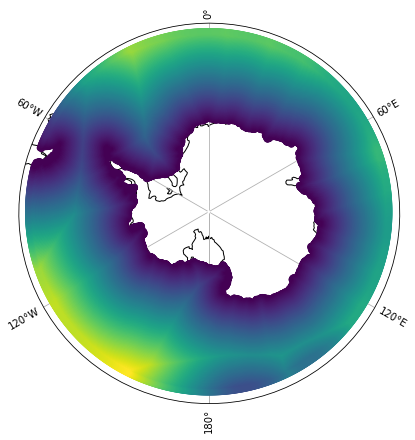

In [29]:
fig, ax = prepare_plot()

ax.scatter(dc['nav_lon'].values, dc['nav_lat'].values, c=dc['Tcoast'].values[0,:,:], \
           zorder=3, transform=ccrs.PlateCarree())